In [2]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import aslinearoperator, lsqr
import matplotlib.pyplot as plt
import tqdm
import sys
sys.path.append("../../")
from DynamicalSystems.kernels import RBF
from DynamicalSystems.reduced_rank_regression import reduced_rank_regression

In [3]:
df_pd = pd.read_pickle("full_dataframe").interpolate(axis=0)
#Get stations and measurements 
stations = set()
measurements = set()
for col in df_pd.columns:
    meas, stat = col.split("_")
    measurements.add(meas)
    stations.add(stat)
length_scales = dict()
for m in measurements:
    length_scales[m] = df_pd.filter(regex= m + "_*").std().mean()
    df_pd[df_pd.filter(regex= m + "_*").columns] /= length_scales[m]
df = df_pd.to_numpy()
nan_mask = np.isnan(df).any(axis=1)
dataset_indexes = []
stride = 1
for idx, val in enumerate(nan_mask[:-stride]):
    if val == False:
        if nan_mask[idx + stride] == False:
            dataset_indexes.append((idx, idx+ stride))
dataset_indexes = np.array(dataset_indexes)
kernel = RBF(length_scale=np.float32(10))
inputs = df[dataset_indexes[:,0]].astype('float32')
evolved_inputs = df[dataset_indexes[:,1]].astype('float32')
regularizer = np.float32(1)

In [5]:
evals_old, evecs_old = reduced_rank_regression(inputs, evolved_inputs, kernel, 5, regularizer=regularizer, center_kernel=True, _cumbersome_diagonalization= True)
#evals, evecs = reduced_rank_regression(inputs, evolved_inputs, kernel, 5, regularizer=regularizer, center_kernel=True, _cumbersome_diagonalization=False)

In [1]:
plt.plot(np.real(evals), np.imag(evals), 'k.')
plt.plot(np.real(evals_old), np.imag(evals_old), 'rx')
plt.axis("equal")

NameError: name 'plt' is not defined

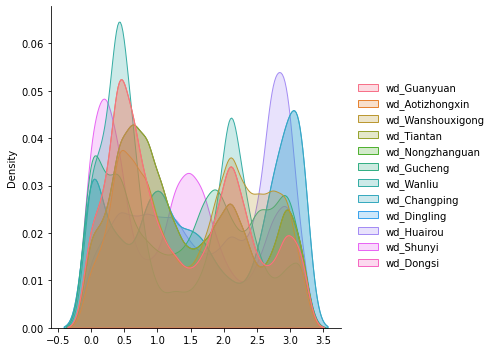

In [21]:
import seaborn as sns
ax = sns.displot(df_pd.filter(regex="wd_*"), kind='kde', fill=True)